In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("summer.csv")

In [2]:
df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


##  1. In how many cities Summer Olympics is held so far?


In [3]:
len(df['City'].unique())

22

In [4]:
df['City'].unique()

array(['Athens', 'Paris', 'St Louis', 'London', 'Stockholm', 'Antwerp',
       'Amsterdam', 'Los Angeles', 'Berlin', 'Helsinki',
       'Melbourne / Stockholm', 'Rome', 'Tokyo', 'Mexico', 'Munich',
       'Montreal', 'Moscow', 'Seoul', 'Barcelona', 'Atlanta', 'Sydney',
       'Beijing'], dtype=object)

## 2. Which sport is having most number of Gold Medals so far? (Top 5)

In [5]:
g=df.groupby('Medal')['Sport']

In [6]:
go=g.get_group('Gold')

In [7]:
go=pd.DataFrame(go,columns=['Sport'])

In [8]:
go

,Sport
0,Aquatics
3,Aquatics
6,Aquatics
9,Aquatics
13,Athletics
...,...
31145,Wrestling
31149,Wrestling
31153,Wrestling
31157,Wrestling


In [9]:
df_gold=[]
for i in go['Sport'].unique():
    df_gold.append([i,len(go[go['Sport']==i])])
df_gold=pd.DataFrame(df_gold,columns=['Sport','No.of Gold Medal'])
df_gold=df_gold.sort_values(by='No.of Gold Medal',ascending=False).head()

In [10]:
df_gold

,Sport,No.of Gold Medal
0,Aquatics,1421
1,Athletics,1215
17,Rowing,890
4,Gymnastics,820
3,Fencing,552


<AxesSubplot:xlabel='Sport'>

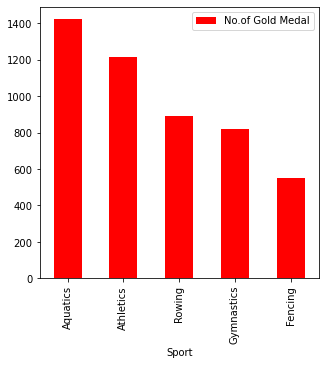

In [11]:
df_gold.plot(x='Sport',y='No.of Gold Medal',figsize=(5,5),kind='bar',color="Red")

## 3. Which sport is having most number of medals so far?

In [12]:
df_sp=[]
for sport in df['Sport'].unique():
    df_sp.append([sport,len(df[df['Sport']==sport])])
df_sp=pd.DataFrame(df_sp,columns=['Sport','Medals Won'])
df_sp=df_sp.sort_values(by='Medals Won',ascending=False).head()

In [13]:
df_sp

,Sport,Medals Won
0,Aquatics,4170
1,Athletics,3638
17,Rowing,2667
4,Gymnastics,2307
3,Fencing,1613


<AxesSubplot:xlabel='Sport'>

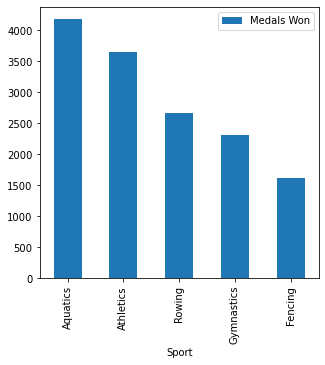

In [14]:
df_sp.plot(x='Sport',y='Medals Won',kind='bar',figsize=(5,5))

## 4. Which player has won most number of medals?

In [15]:
df_at=[]
for athlete in df['Athlete'].unique():
    df_at.append([athlete,len(df[df['Athlete']==athlete])])
df_at=pd.DataFrame(df_at,columns=['Athlete','Medals Won'])
df_at=df_at.sort_values(by='Medals Won',ascending=False).head()

In [16]:
df_at

,Athlete,Medals Won
18640,"PHELPS, Michael",22
7197,"LATYNINA, Larisa",18
9948,"ANDRIANOV, Nikolay",15
6591,"ONO, Takashi",13
5103,"MANGIAROTTI, Edoardo",13


<AxesSubplot:xlabel='Athlete'>

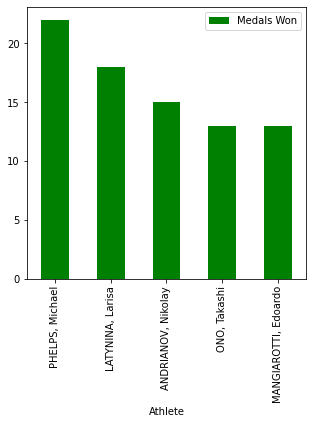

In [17]:
df_at.plot(x='Athlete',y='Medals Won',kind='bar',figsize=(5,5),color="green")

## 5. Which player has won most number Gold Medals of medals? (Top 5)

In [19]:
a=df[df['Medal']=='Gold']
aa=[]
for j in df['Athlete'].unique():
     aa.append([j,len(a[a['Athlete']==j])])
aa=pd.DataFrame(aa,columns=['Athlete','gold'])
aa=aa.sort_values(by='gold',ascending=False).head()

In [20]:
aa

,Athlete,gold
18640,"PHELPS, Michael",18
12468,"LEWIS, Carl",9
8811,"SPITZ, Mark",9
2262,"NURMI, Paavo",9
7197,"LATYNINA, Larisa",9


<AxesSubplot:xlabel='Athlete'>

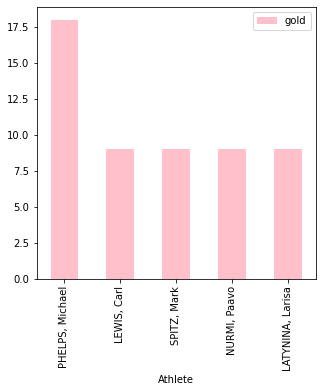

In [21]:
aa.plot(x='Athlete',y='gold',kind='bar',figsize=(5,5),color="pink")

## 6. In which year India won first Gold Medal in Summer Olympics?

In [22]:
b=df[df['Country']=='IND']
b=b[b['Medal']=='Gold']

In [23]:
b.head(1)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
5512,1928,Amsterdam,Hockey,Hockey,"ALLEN, Richard James",IND,Men,Hockey,Gold


In [24]:
b['Year'].head(1)

5512    1928
Name: Year, dtype: int64

## 7. Which event is most popular in terms on number of players? (Top 5)

In [25]:
df_ev=[]
for event in df['Event'].unique():
    df_ev.append([event,len(df[df['Event']==event])])
df_ev=pd.DataFrame(df_ev,columns=['Event','No.of Players'])
df_ev=df_ev.sort_values(by='No.of Players',ascending=False).head()

In [26]:
df_ev

,Event,No.of Players
80,Football,1497
176,Hockey,1422
138,Team Competition,1147
327,Basketball,1012
337,Handball,973


<AxesSubplot:xlabel='Event'>

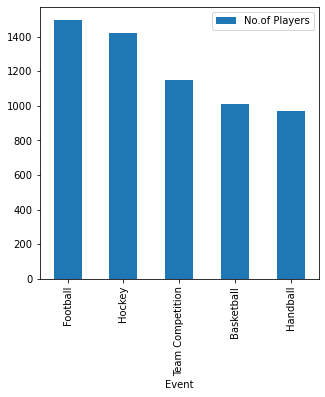

In [27]:
df_ev.plot(x='Event',y='No.of Players',kind='bar',figsize=(5,5))

## 8.Which sport is having most female Gold Medalists?

In [28]:
c=df[df['Gender']=='Women']
c=c[c['Medal']=='Gold']

In [29]:
dd=[]
for k in df['Sport'].unique():
     dd.append([k,len(c[c['Sport']==k])])
dd=pd.DataFrame(dd,columns=['Sport','gold'])
dd=dd.sort_values(by='gold',ascending=False).head()

In [30]:
dd

,Sport,gold
0,Aquatics,589
1,Athletics,389
4,Gymnastics,268
17,Rowing,217
35,Volleyball,166


<AxesSubplot:xlabel='Sport'>

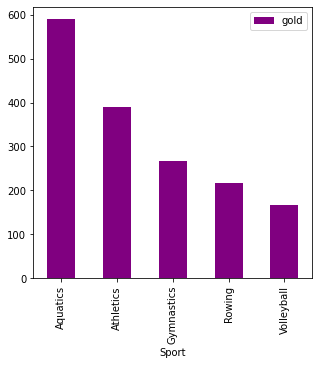

In [31]:
dd.plot(x='Sport',y='gold',kind='bar',figsize=(5,5),color="purple")